# Preview

In [1]:
# libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Linear Regression

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [3]:
diabetes_X_1 = diabetes_X[:, np.newaxis, 2]

In [4]:
diabetes_X.shape, diabetes_X_1.shape

((442, 10), (442, 1))

In [5]:
diabetes_X_train = diabetes_X_1[:-20]
diabetes_X_test = diabetes_X_1[-20:]

diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [6]:
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
diabetes_y_pred = regr.predict(diabetes_X_test)

In [8]:
[*zip(diabetes_y_pred, diabetes_y_test)]

[(225.9732401030043, 233.0),
 (115.74763374486452, 91.0),
 (163.27610621121843, 111.0),
 (114.73638964983571, 152.0),
 (120.80385422000853, 120.0),
 (158.21988573607436, 67.0),
 (236.08568105329238, 310.0),
 (121.81509831503735, 94.0),
 (99.56772822440365, 183.0),
 (123.83758650509495, 66.0),
 (204.7371141073994, 173.0),
 (96.53399593931724, 72.0),
 (154.17490935595916, 49.0),
 (130.9162951702966, 64.0),
 (83.38782270394276, 48.0),
 (171.36605897144887, 178.0),
 (137.9950038354982, 104.0),
 (137.9950038354982, 132.0),
 (189.56845268196736, 220.0),
 (84.39906679897157, 57.0)]

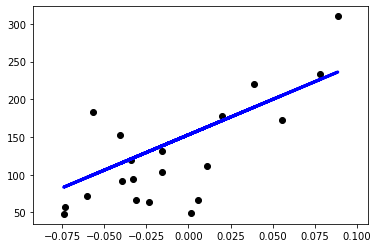

In [9]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.show()

## Classification

In [10]:
dataset = pd.read_csv('data/iris.data', names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'])

In [11]:
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [12]:
setosa = dataset[dataset['Species']=='Iris-setosa']
versicolor = dataset[dataset['Species']=='Iris-versicolor']
virginica = dataset[dataset['Species']=='Iris-virginica']

setosa.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [13]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


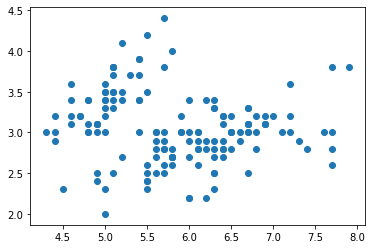

In [14]:
plt.scatter(dataset['SepalLengthCm'], dataset['SepalWidthCm'])

<Figure size 432x288 with 0 Axes>

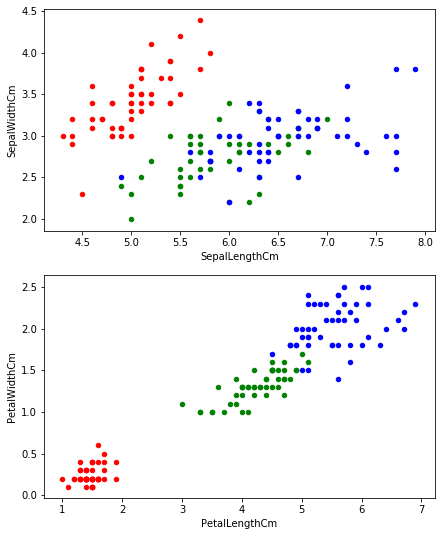

In [15]:
plt.figure()
fig, ax = plt.subplots(2,1, figsize=(7,9))

setosa.plot(x='SepalLengthCm', y='SepalWidthCm', kind='scatter', ax=ax[0], color='r')#, sharex=False, sharey=False)
versicolor.plot(x='SepalLengthCm', y='SepalWidthCm', kind='scatter', ax=ax[0], color='g')
virginica.plot(x='SepalLengthCm', y='SepalWidthCm', kind='scatter', ax=ax[0], color='b')

setosa.plot(x='PetalLengthCm', y='PetalWidthCm', kind='scatter', ax=ax[1], color='r')#, sharex=False, sharey=False)
versicolor.plot(x='PetalLengthCm', y='PetalWidthCm', kind='scatter', ax=ax[1], color='g')
virginica.plot(x='PetalLengthCm', y='PetalWidthCm', kind='scatter', ax=ax[1], color='b')

## Preprocessing

In [16]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

In [21]:
# test_size: can adjust the percentage of test data wrt train data
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

[*map(len, [x_train, y_train, x_test, y_test])]

[105, 105, 45, 45]

In [22]:
X.shape, x_train.shape, x_test.shape

((150, 2), (105, 2), (45, 2))

In [23]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
x_scaled_train = scaler.transform(x_train)
x_scaled_test = scaler.transform(x_test)

## Logistic Regression and model training

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [28]:
logreg = LogisticRegression()